# Boston House Price Dataset

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics


##### Importig the Boston House Price Dataset

In [2]:
house_price_dataset = pd.read_csv('boston.csv')

In [3]:
house_price_dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2



CRIM per capita crime rate by town
ZN proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS proportion of non-retail business acres per town

CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX nitric oxides concentration (parts per 10 million)

RM average number of rooms per dwelling

AGE proportion of owner-occupied units built prior to 1940

DIS weighted distances to five Boston employment centres

RAD index of accessibility to radial highways

TAX full-value property-tax rate per 10,000usd

PTRATIO pupil-teacher ratio by town

B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT % lower status of the population


# What to do with this data ?

#### House Price Data --> Data pre processing ---> Data Analysis

#### Data Analysis  ---> Train Test Split -----> XG booster Regressor ----> Evaluation

In [4]:
#checking the number of rows and columns in the dataframe 
house_price_dataset.shape

(506, 14)

In [5]:
#Checking the dataset having missing values or not
house_price_dataset.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [6]:
#Statistical data of the dataframe
house_price_dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


###### Understanding the correlation between the various features in the datasets

In [7]:
correlation = house_price_dataset.corr()

<AxesSubplot:>

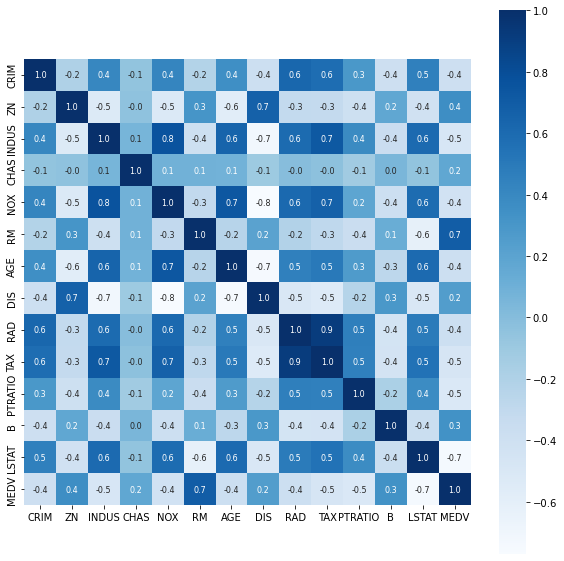

In [8]:
#constructing a heatmap to understand the correlation
plt.figure(figsize = (10,10))
sns.heatmap(correlation , cbar = True , square = True, fmt ='.1f' ,annot = True , annot_kws = {'size':8} , cmap = 'Blues')    

###### Splitting the data and Target

In [9]:
X = house_price_dataset.drop(['MEDV'],axis = 1)
Y = house_price_dataset['MEDV']

In [10]:
print(X)
print(Y)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       1

##### splitting the data into train and testing data 

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X ,Y, test_size = 0.2 , random_state = 1)

In [12]:
print(X.shape, X_train.shape, X_test.shape)

(506, 13) (404, 13) (102, 13)


# Model Training

### XGBooster Regressor

In [13]:
# Loading the model
model = XGBRegressor()

In [14]:
#fiiting the data in the model
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

### Evaluation of the Model

#### Prediction on Training Data

In [15]:
# accuracy for prediction on the training data
training_data_prediction = model.predict(X_train)

In [16]:
print(training_data_prediction)

[25.245571  23.32921    7.210682  21.154896  11.702352  26.999006
 29.584614  26.544731  43.50524   23.625568  11.002917  33.40945
 36.007214  36.40028   19.037712  20.18499   34.905746  49.99532
 19.321676  14.898901  26.617535  19.894657  24.802687  21.180086
 23.923895  20.586973  23.074522  27.950964  19.987543  23.094906
 25.010534   9.705043  23.892748  36.09172   13.418543  12.731809
 39.79168   10.393237  20.598629  17.775103  19.482315  23.710855
 28.513987  24.29506   23.771362  19.072584  28.377209  20.49642
 33.825535  14.507262  20.39619   16.009405  13.304443  30.793392
 27.49651   24.428276  24.389343  25.122246  43.8164    21.898586
 26.22088   14.255268  20.789656  20.105751  23.099632  13.068087
 16.195873  24.834087  20.208426  22.484184  14.791592  28.696594
 20.114979  23.412987  31.992868  19.124737  49.992138  20.895212
 21.69236   21.999992  17.206669  30.303902  12.287807  21.39682
 20.501791  35.200222  19.602581  22.003605  21.689674  14.086667
 21.088537  15

In [17]:
# R square error 
score_1 = metrics.r2_score(Y_train, training_data_prediction)
print('R squared error: ' , score_1)

#Mean absolute error 
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)
print('Mean Absolute error :', score_2)

R squared error:  0.9999952977725205
Mean Absolute error : 0.01375658535721277


#### Visualizing the actual Prices and predicted prices

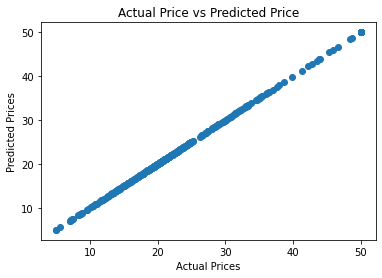

In [18]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Price vs Predicted Price')
plt.show()

## Prediction on Test Data

In [19]:
# accuracy for prediction on the test data
test_data_prediction = model.predict(X_test)

In [20]:
# R square error 
score_1 = metrics.r2_score(Y_test, test_data_prediction)
print('R squared error: ' , score_1)

#Mean absolute error 
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)
print('Mean Absolute error :', score_2)

R squared error:  0.9085331557145866
Mean Absolute error : 2.344013180452235
